In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

# House Prices: Advanced Regression Techniques

## Challenge from:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Objectives

In this notebook, we use machine learning algorithms to predict the housing price. The main aim of this work is to predict a house price for the given features to maximize the prediction accuracy by using the advanced regression techiniques.

## Data Manipulation

### Check-out the Data

In [5]:
df_train = pd.read_csv('train.csv')
df_test =  pd.read_csv('train.csv')

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### OBS: You can check the data definitions in the text file 'data_description.txt'

### Data Visualization Overview

#### Let's plot the Johnson's SU-distribution, the normal distribution and the log-normal distribution for the sales price.

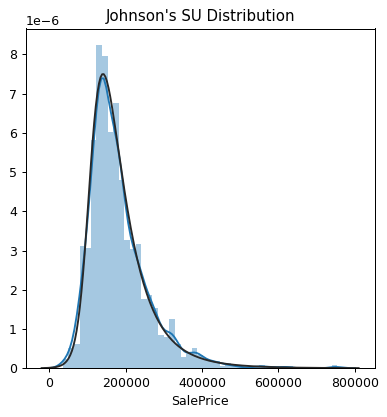

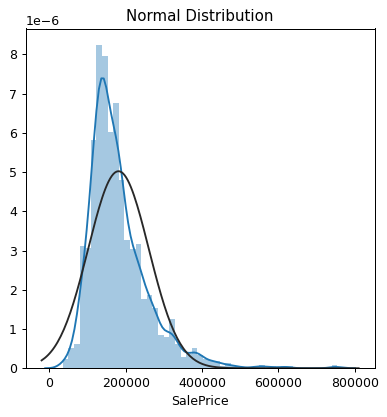

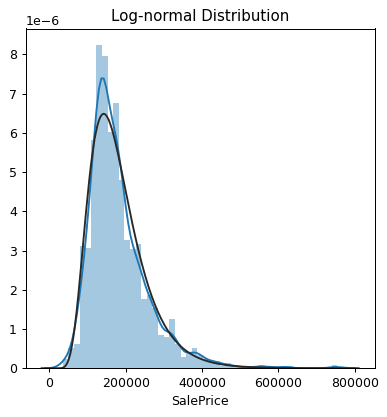

In [8]:
%matplotlib inline
import scipy.stats as st
y=df_train['SalePrice']
#plt.style.use('ggplot')

plt.figure(1,figsize=(5,5), dpi= 90);
plt.title("Johnson's SU Distribution")
sns.distplot(y,kde=True,fit=st.johnsonsu)

plt.figure(2,figsize=(5,5), dpi= 90);
plt.title('Normal Distribution')
sns.distplot(y,kde=True,fit=st.norm)

plt.figure(3,figsize=(5,5), dpi= 90);
plt.title('Log-normal Distribution')
sns.distplot(y,kde=True,fit=st.lognorm)

#### Let's also plot the correlation heat map with the numerical data

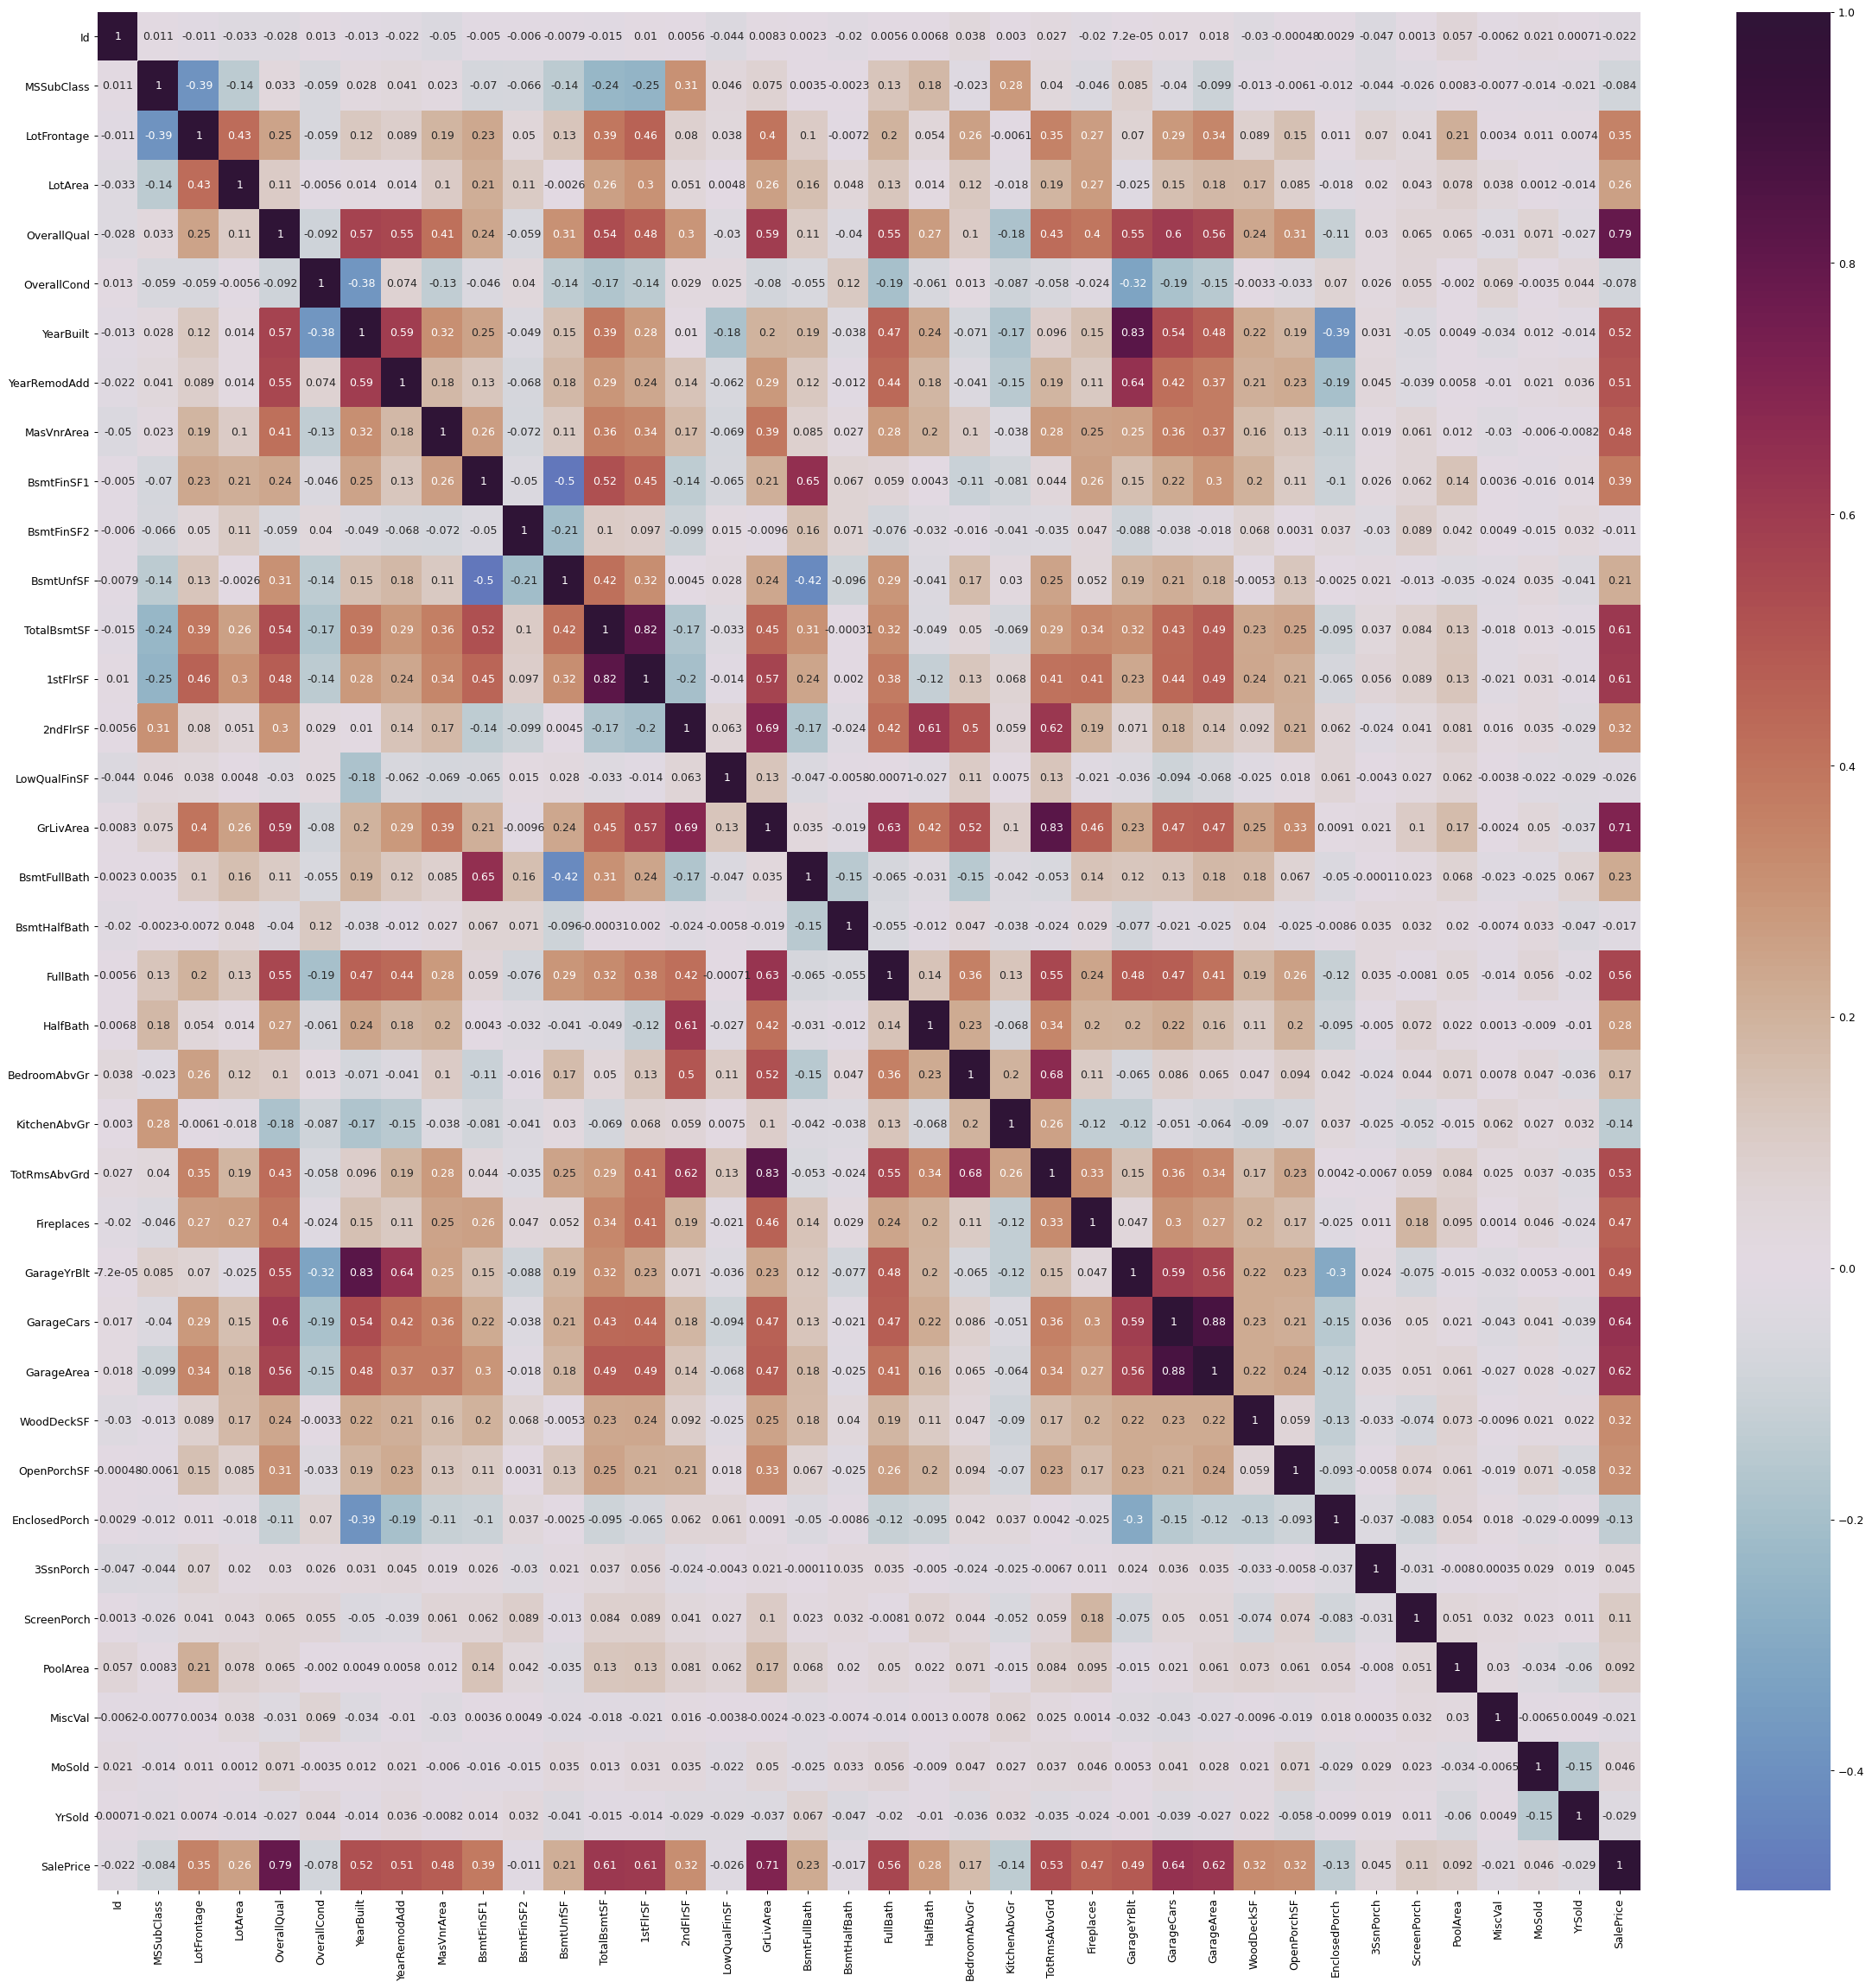

In [9]:
plt.figure(figsize=(32,32), dpi= 90)
sns.heatmap(df_train.corr(), cmap='twilight_shifted', center=0, annot=True)

# Decorations
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Let's consider only the most strongly correlated numerical values with SalePrice
The correlation that is at least greater than 0.1.
This will not consider variables that are correlated with the sale price, such as ID.

In [10]:
df_train_corr=df_train.corr()['SalePrice'][:-1]
feature_list=df_train_corr[abs(df_train_corr)>0.2].sort_values(ascending=False)
feature_list

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
Name: SalePrice, dtype: float64

#### Let's visualize more closely these values in the feature_list and their correlation with the sales price

In [11]:
list_corr = list(feature_list.index)

In [12]:
df_train_num = df_train[list_corr+['SalePrice']]
df_test_num = df_test[list_corr+['SalePrice']]
df_train_num

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,...,706,65.0,0,854,61,1,8450,1,150,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,...,978,80.0,298,0,0,0,9600,0,284,181500
2,7,1786,2,608,920,920,2,6,2001,2002,...,486,68.0,0,866,42,1,11250,1,434,223500
3,7,1717,3,642,756,961,1,7,1915,1970,...,216,60.0,0,756,35,0,9550,1,540,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,...,655,84.0,192,1053,84,1,14260,1,490,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000,...,0,62.0,0,694,40,1,7917,0,953,175000
1456,6,2073,2,500,1542,2073,2,7,1978,1988,...,790,85.0,349,0,0,0,13175,1,589,210000
1457,7,2340,1,252,1152,1188,2,9,1941,2006,...,275,66.0,0,1152,60,0,9042,0,877,266500
1458,5,1078,1,240,1078,1078,1,5,1950,1996,...,49,68.0,366,0,0,0,9717,1,0,142125


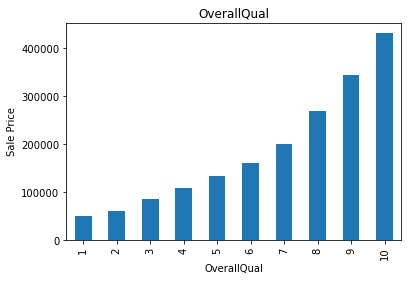

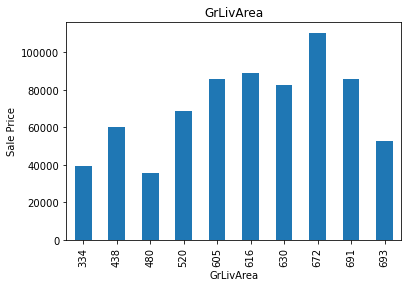

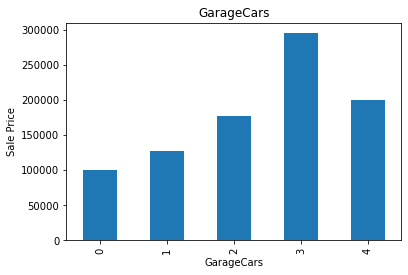

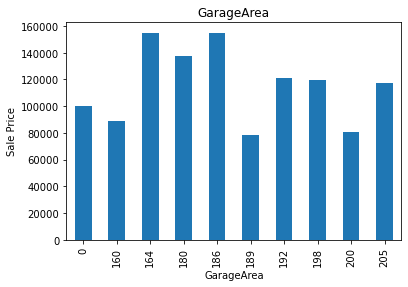

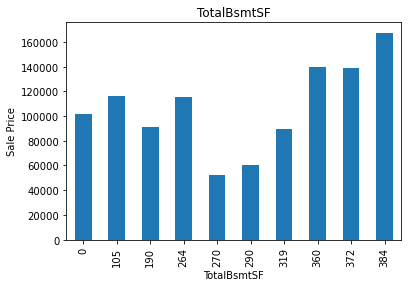

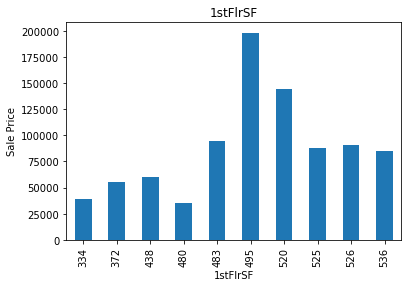

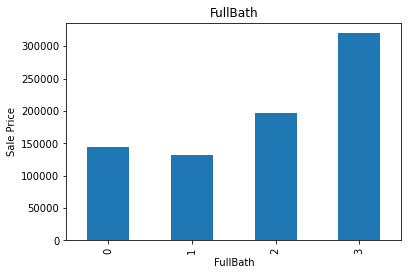

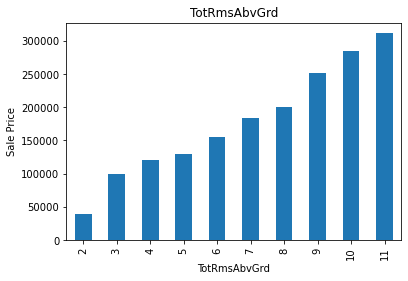

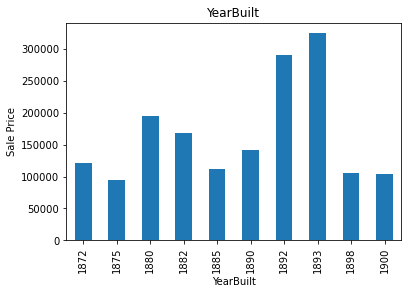

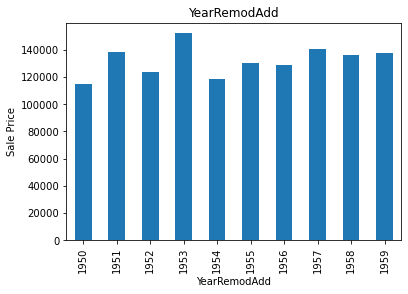

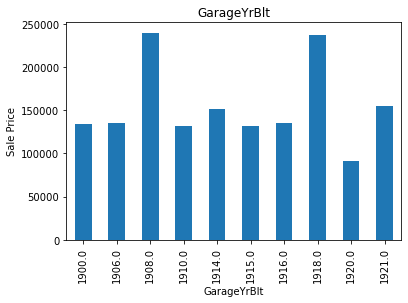

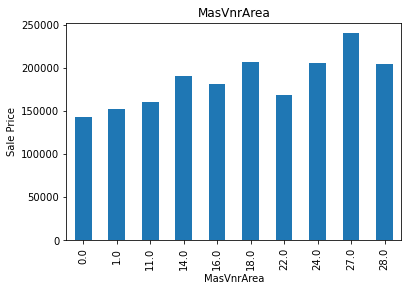

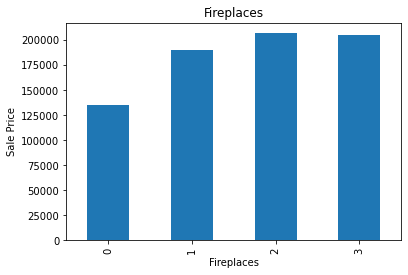

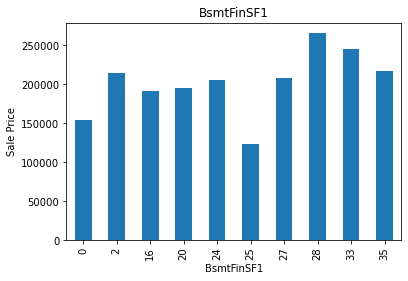

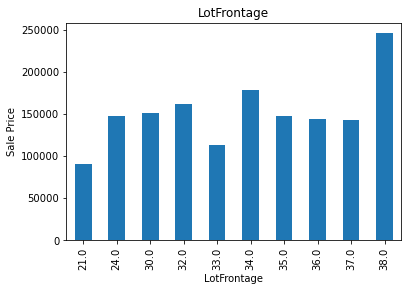

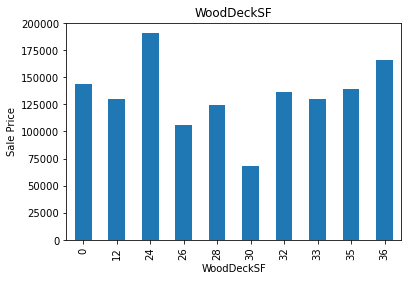

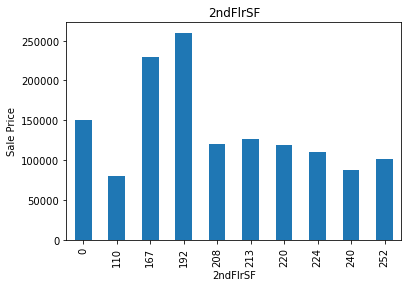

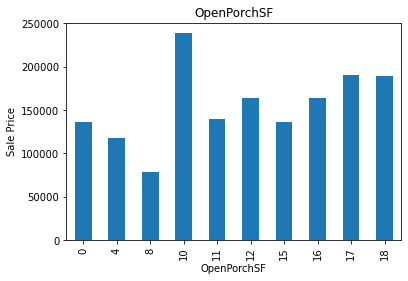

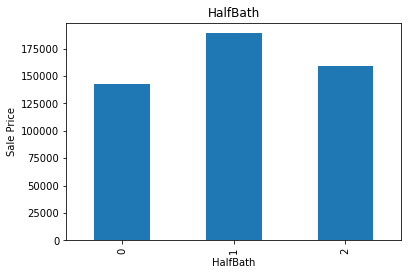

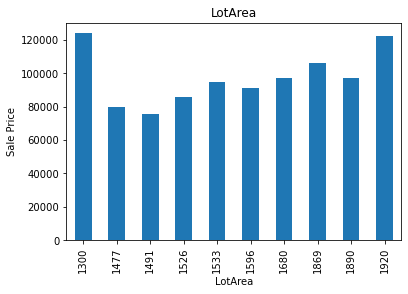

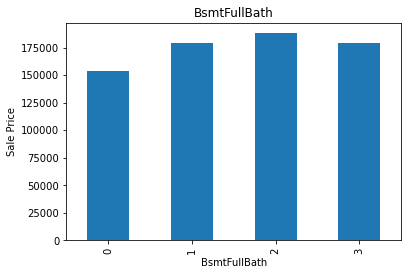

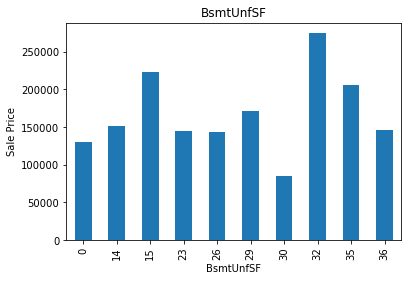

In [13]:
for i in range(0,len(list_corr)):
    df_train.groupby(list_corr[i])['SalePrice'].median().head(10).plot.bar()
    plt.xlabel(list_corr[i])
    plt.ylabel('Sale Price')
    plt.title(list_corr[i])
    plt.show()

#### Let's visualize more closely the occurency of the the feature_list values

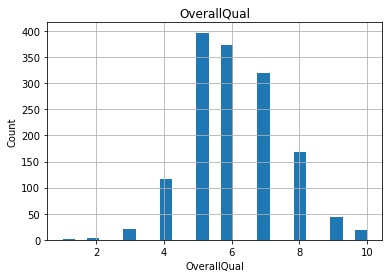

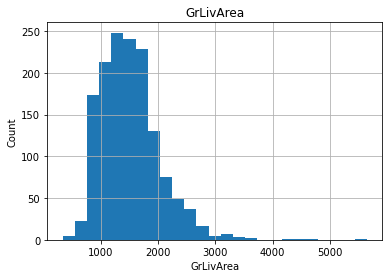

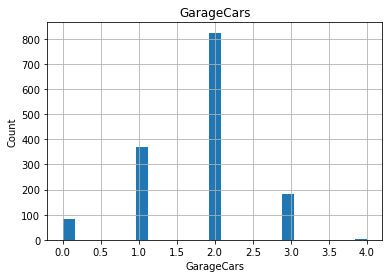

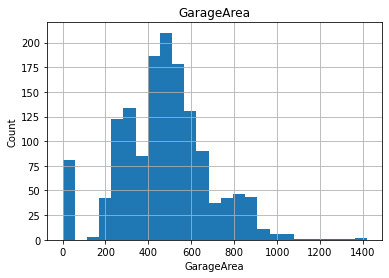

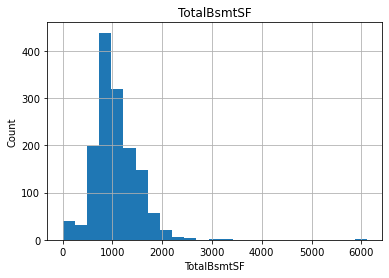

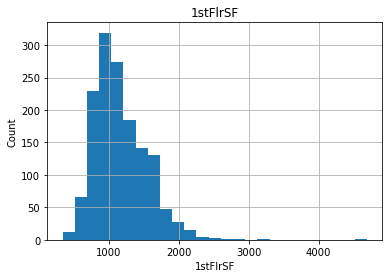

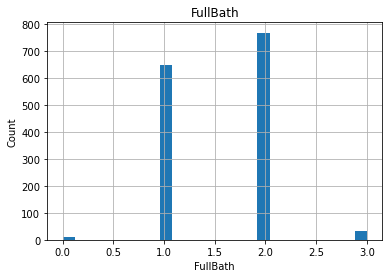

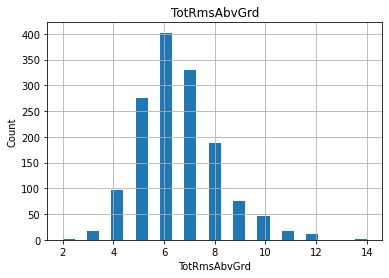

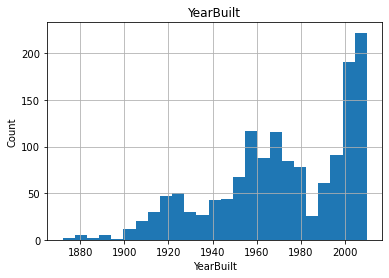

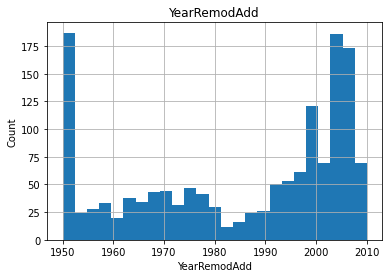

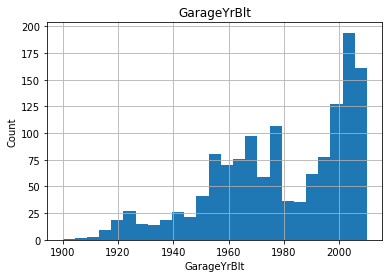

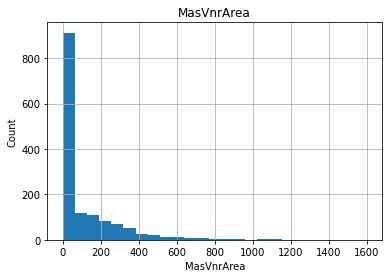

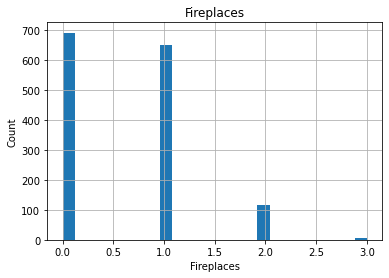

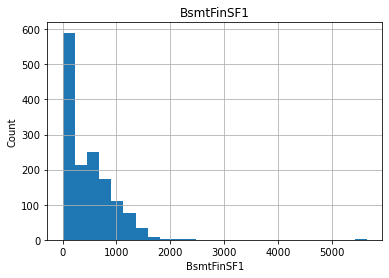

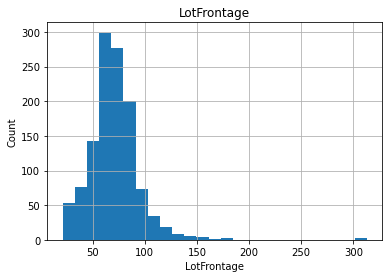

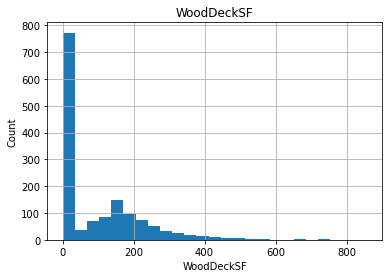

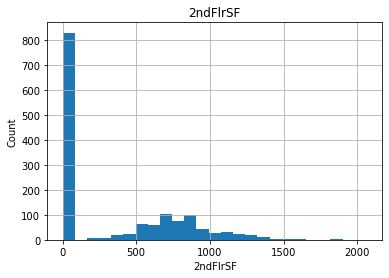

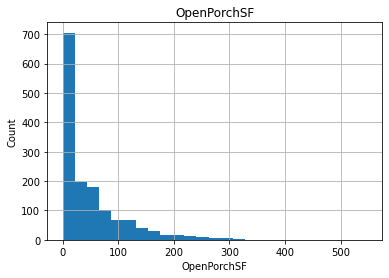

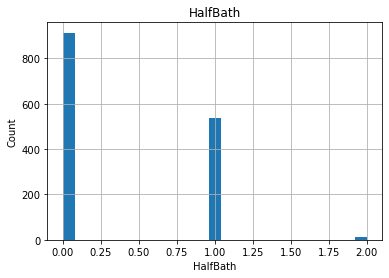

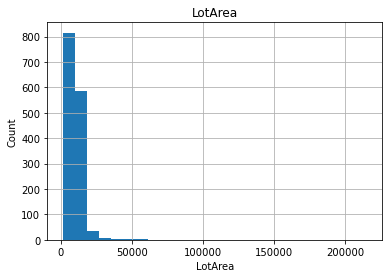

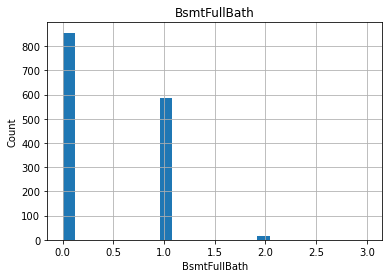

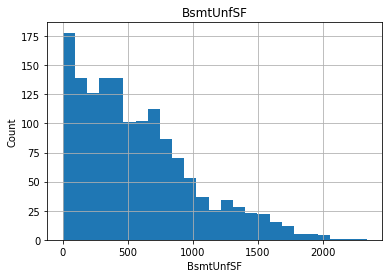

In [14]:
for i in range(0,len(list_corr)):
    df_train[list_corr[i]].hist(bins=25)
    plt.xlabel(list_corr[i])
    plt.ylabel("Count")
    plt.title(list_corr[i])
    plt.show()

#### Let's visualize the categorical data relationship with sales price

In [15]:
# Let's define  the Categorical Data
categorical_features = df_train.select_dtypes(include=['object']).columns
print('Categorical')
print(categorical_features)

df_train_cat=df_train[categorical_features]
df_test_cat=df_test[categorical_features]

Categorical
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


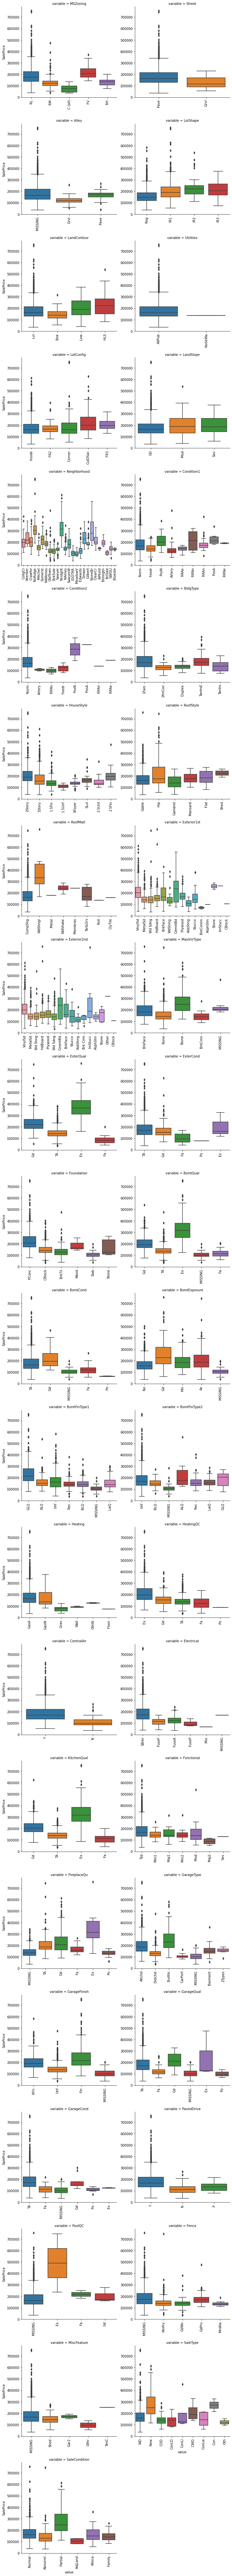

In [16]:
for c in df_train_cat:
    df_train[c] = df_train[c].astype('category')
    if df_train[c].isnull().any():
        df_train[c] = df_train[c].cat.add_categories(['MISSING'])
        df_train[c] = df_train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

### Cleaning the Data

In [17]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,MISSING,Reg,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,MISSING,Reg,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,MISSING,IR1,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,MISSING,IR1,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,MISSING,IR1,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,12,2008,WD,Normal,250000


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

Let's delete the missing data if it is missing more 85% of the data. For the other cases, the data will be ajusted to fill the missing data.

In [19]:
missing_number = df_train.isnull().sum().sort_values(ascending=False)
missing_number

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
SalePrice         0
ExterCond         0
               ... 
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
Id                0
Length: 81, dtype: int64

In [20]:
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

In [21]:
missing_data = pd.concat([missing_number, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
SalePrice,0,0.000000
ExterCond,0,0.000000


#### First, let's delete the data that it is missing more 85% of it.

In [22]:
columns_list = list(df_train.isnull().count().index)
columns_list

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [23]:
for i in range(0, len(columns_list)):
    if percent[columns_list[i]] > 0.85:
        df_train.drop(columns_list[i], axis=1, inplace=True)
        df_test.drop(columns_list[i], axis=1, inplace=True)
        missing_data.drop(columns_list[i], inplace=True)
missing_data.head(17)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000


In [24]:
print('Numerical')
numerical_features = df_train_num.columns
numerical_features

Numerical


Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea',
       'BsmtFullBath', 'BsmtUnfSF', 'SalePrice'],
      dtype='object')

In [25]:
df_train = pd.concat([df_train_cat, df_train_num], axis=1)
df_test = pd.concat([df_test_cat, df_test_num], axis=1)
df_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,706,65.0,0,854,61,1,8450,1,150,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,978,80.0,298,0,0,0,9600,0,284,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,486,68.0,0,866,42,1,11250,1,434,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,216,60.0,0,756,35,0,9550,1,540,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,655,84.0,192,1053,84,1,14260,1,490,250000


#### Handling the Median Columns

These columns are substituted from NaN value to their median. 
These columns have numerical data.

In [26]:
list_median = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

for i in range(0, len(list_median)):
    df_train[list_median[i]] = df_train[list_median[i]].fillna(df_train[list_median[i]].median())
    df_test[list_median[i]] = df_test[list_median[i]].fillna(df_test[list_median[i]].median())

###### Handling the None Columns

These columns are substituted from NaN value to 'None'. 
These columns have more than 3% of the missing data and are not numerical.

In [27]:
list_none = ['Fence', 'FireplaceQu','GarageCond', 'GarageType', 'GarageFinish', 'GarageQual']

for i in range(0, len(list_none)):
    df_train[list_none[i]] = df_train[list_none[i]].fillna('None')
    df_test[list_none[i]] = df_test[list_none[i]].fillna('None')

#### Handling the Mode Columns

These columns are substituted from NaN value to the mode of each column. 
These columns have less than 3% of the missing data and are not numerical.

In [28]:
list_mode =  ['MasVnrType', 'Electrical', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']

for i in range(0, len(list_mode)):
    df_train[list_mode[i]]=df_train[list_mode[i]].fillna(df_train[list_mode[i]].mode())
    df_test[list_mode[i]]=df_test[list_mode[i]].fillna(df_test[list_mode[i]].mode())

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   Street         1460 non-null   object 
 2   Alley          91 non-null     object 
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  RoofStyle      1460 non-null   object 
 14  RoofMatl       1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1452 non-null   object 
 18  ExterQua

### Separating the Numerical Data from the Categorical

In [30]:
categorical_features = df_train.select_dtypes(include=['object']).columns
numerical_features = df_train.select_dtypes(exclude = ["object"]).columns

categorical_features = list(categorical_features)
numerical_features = list(numerical_features)

df_train_num=df_train[numerical_features]
df_train_cat=df_train[categorical_features]

df_test_num=df_test[numerical_features]
df_test_cat=df_test[categorical_features]

### Creating Dummies Variables for the Categorical Data

Let's include a categorical variable in the regression model. For that we need to record the categorical variables as dummies variables.

In [31]:
df_train_cat = pd.get_dummies(df_train_cat, columns=categorical_features)
df_test_cat = pd.get_dummies(df_test_cat, columns=categorical_features)

In [32]:
df_train = pd.concat([df_train_cat, df_train_num], axis=1)
df_test = pd.concat([df_test_cat, df_test_num], axis=1)
df_train.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,SalePrice
0,0,0,0,1,0,0,1,0,0,0,...,706,65.0,0,854,61,1,8450,1,150,208500
1,0,0,0,1,0,0,1,0,0,0,...,978,80.0,298,0,0,0,9600,0,284,181500
2,0,0,0,1,0,0,1,0,0,1,...,486,68.0,0,866,42,1,11250,1,434,223500
3,0,0,0,1,0,0,1,0,0,1,...,216,60.0,0,756,35,0,9550,1,540,140000
4,0,0,0,1,0,0,1,0,0,1,...,655,84.0,192,1053,84,1,14260,1,490,250000


## Training a Linear Regression Model

In [33]:
X_test = df_test.loc[:, df_test.columns != 'SalePrice']
y_test = df_test['SalePrice']

In [34]:
X_train = df_train.loc[:, df_train.columns != 'SalePrice']
y_train = df_train['SalePrice']

## Creating and Training the Model

### Simple Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression()

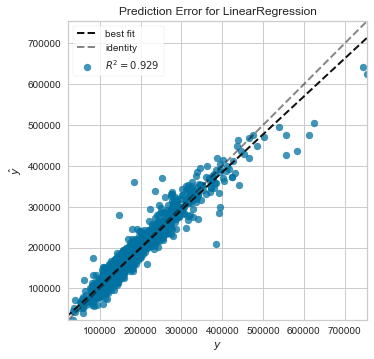

In [38]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [39]:
predictions = lm.predict(X_test)

In [40]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 13765.066008100117
MSE: 449076805.92598987
RMSE: 21191.432370795275


### XGBoost

In [41]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) 
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=360, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

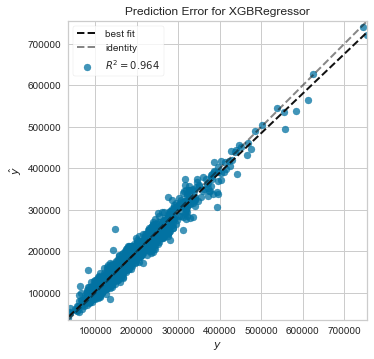

In [42]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model_xgb)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [43]:
predictions = model_xgb.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 10865.406022581335
MSE: 223898868.7799855
RMSE: 14963.250608740918


### RandomForest

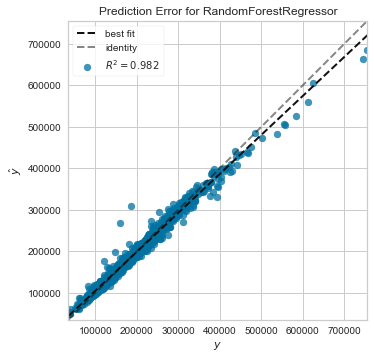

In [44]:
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import PredictionError
rdf_r=RandomForestRegressor(n_estimators=600,random_state=0, n_jobs= -1)
visualizer = PredictionError(rdf_r)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [45]:
predictions = rdf_r.predict(X_test)

In [46]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6410.494100456621
MSE: 114754080.25636597
RMSE: 10712.333091178876


### Ridge

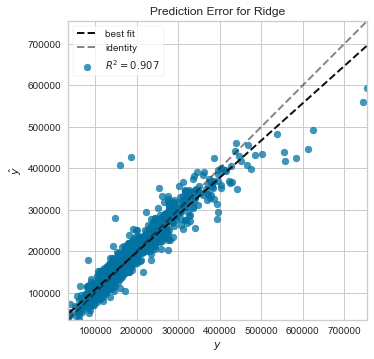

In [47]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError
model_rdg=Ridge(alpha=3.181)
visualizer = PredictionError(model_rdg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### Decision Tree

This the best model in this project that fits the data available.

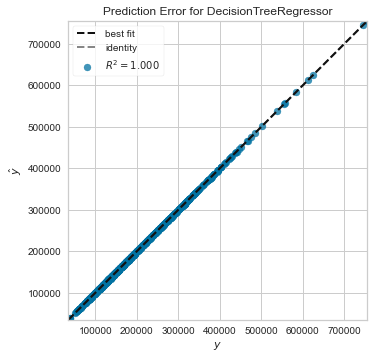

In [59]:
from yellowbrick.regressor import PredictionError
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
visualizer = PredictionError(dtree)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [60]:
from sklearn.tree import DecisionTreeRegressor
dt_r = DecisionTreeRegressor(random_state=0) 
dt_r.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [61]:
predictions = dt_r.predict(X_test)

In [62]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.136986301369863
MSE: 19263.698630136987
RMSE: 138.793726912051


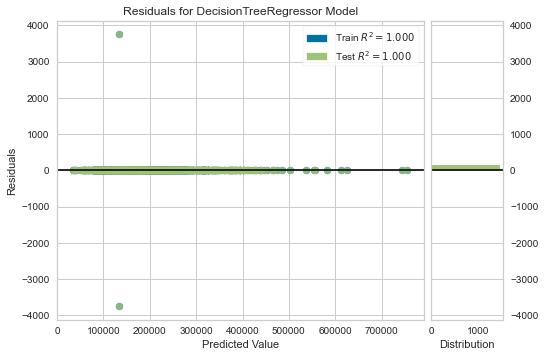

In [63]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(dtree)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [65]:
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

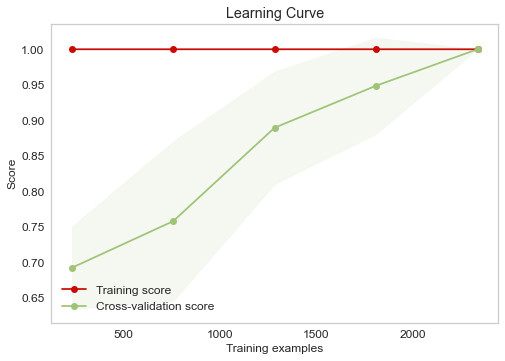

In [66]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(dtree, X, y)
plt.show()

### Lasso

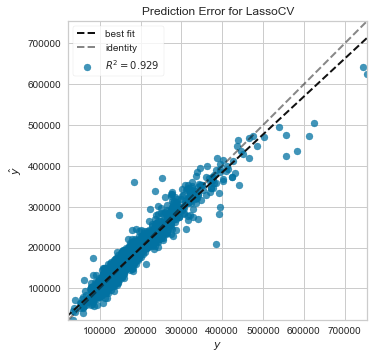

In [67]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model_lasso)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()